In [57]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [68]:
path = r"C:\Users\arthur.oliveira\OneDrive\Codes\Database\TV Shows\TMDB_tv_dataset_v3.csv"

df = pd.read_csv(path)

In [69]:
# Mostra todas as colunas para datasets com muitas colunas
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)

In [71]:
df.columns

Index(['id', 'name', 'number_of_seasons', 'number_of_episodes',
       'original_language', 'vote_count', 'vote_average', 'overview', 'adult',
       'backdrop_path', 'first_air_date', 'last_air_date', 'homepage',
       'in_production', 'original_name', 'popularity', 'poster_path', 'type',
       'status', 'tagline', 'genres', 'created_by', 'languages', 'networks',
       'origin_country', 'spoken_languages', 'production_companies',
       'production_countries', 'episode_run_time'],
      dtype='object')

In [72]:
# Removendo colunas que nao usarei

df.drop(['backdrop_path','homepage','poster_path'], axis=1, inplace=True)

In [73]:
pd.set_option('display.max_columns', None)
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158566 entries, 0 to 158565
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    158566 non-null  int64  
 1   name                  158561 non-null  object 
 2   number_of_seasons     158566 non-null  int64  
 3   number_of_episodes    158566 non-null  int64  
 4   original_language     158566 non-null  object 
 5   vote_count            158566 non-null  int64  
 6   vote_average          158566 non-null  float64
 7   overview              89357 non-null   object 
 8   adult                 158566 non-null  bool   
 9   first_air_date        128542 non-null  object 
 10  last_air_date         130608 non-null  object 
 11  in_production         158566 non-null  bool   
 12  original_name         158561 non-null  object 
 13  popularity            158566 non-null  float64
 14  type                  158566 non-null  object 
 15  

In [74]:
df['first_air_date'] = pd.to_datetime(df['first_air_date'])

In [75]:
df['last_air_date'] = pd.to_datetime(df['last_air_date'])

In [65]:
# Verifico valores unicos
a = df['number_of_seasons'].unique()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Scripted'),
  Text(1, 0, 'Documentary'),
  Text(2, 0, 'Miniseries'),
  Text(3, 0, 'Reality'),
  Text(4, 0, 'Talk Show'),
  Text(5, 0, 'Video'),
  Text(6, 0, 'News')])

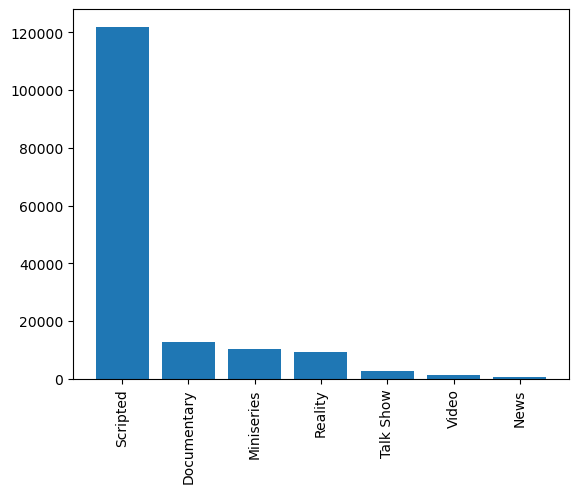

In [66]:
# Atribuo a contagem de valores a uma variavel
type_count = df['type'].value_counts()

# Ploto grafico baseado na contagem
plt.bar(type_count.index,type_count)
plt.xticks(rotation=90)

In [79]:
df['vote_average'].describe()

count    158566.000000
mean          2.449529
std           3.493419
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max          10.000000
Name: vote_average, dtype: float64

In [100]:
df['vote_average'].dropna(inplace=True)

In [101]:
bins = [0,4,6,8,10]
bins_label = ['Muito Ruim','Ruim','OK','Muito Bom']

df['vote_average_category'] = pd.cut(df['vote_average'], bins=bins, labels=bins_label)

In [106]:
vote_groups = df['vote_average_category'].value_counts()

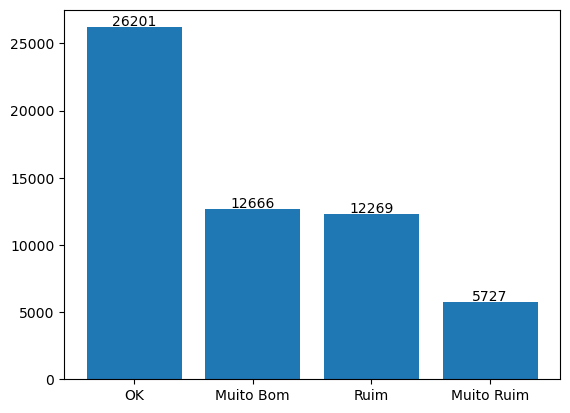

In [118]:
plt.bar(vote_groups.index,vote_groups)
# Adicione rótulos de dados
for i in range(len(vote_groups)):
    plt.text(x=i, y=vote_groups[i]+100, s=vote_groups[i], ha='center')

In [121]:
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,first_air_date,last_air_date,in_production,original_name,popularity,type,status,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time,vote_average_category
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,2011-04-17,2019-05-19,False,Game of Thrones,1083.917,Scripted,Ended,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0,Muito Bom
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,2017-05-02,2021-12-03,False,La Casa de Papel,96.354,Scripted,Ended,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70,Muito Bom
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,2016-07-15,2022-07-01,True,Stranger Things,185.711,Scripted,Returning Series,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0,Muito Bom
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,2010-10-31,2022-11-20,False,The Walking Dead,489.746,Scripted,Ended,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42,Muito Bom
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,2016-01-25,2021-09-10,False,Lucifer,416.668,Scripted,Ended,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45,Muito Bom


In [126]:
df['vote_count'].describe()

count    158566.000000
mean         14.144300
std         196.746395
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       21857.000000
Name: vote_count, dtype: float64

In [157]:
df_votes = df.loc[df['vote_count'] > 1000]

In [144]:
df_votes.describe()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
count,42.000000,42.000000,42.000000,42.0000,42.000000,42.000000,42.000000
mean,49623.571429,6.976190,131.261905,9176.5000,8.301357,301.934595,28.857143
std,36126.970460,6.244952,158.650722,3787.9043,0.363130,316.034680,22.266207
min,456.000000,1.000000,5.000000,5017.0000,6.793000,35.521000,0.000000
25%,1633.500000,3.000000,32.000000,6133.0000,8.135250,116.254250,0.000000
50%,61954.500000,6.000000,72.000000,8658.0000,8.356500,205.894500,36.000000
75%,77044.000000,8.000000,175.500000,10562.0000,8.535250,344.388000,44.750000
max,119051.000000,35.000000,762.000000,21857.0000,8.890000,1647.218000,70.000000


In [158]:
vote_groups_votes = df_votes['vote_average_category'].value_counts()

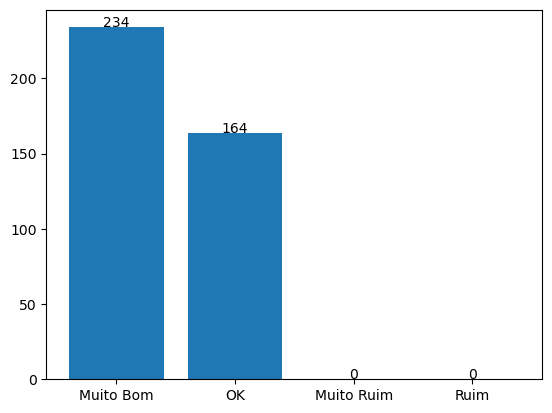

In [159]:
plt.bar(vote_groups_votes.index,vote_groups_votes)
# Adicione rótulos de dados
for i in range(len(vote_groups_votes)):
    plt.text(x=i, y=vote_groups_votes[i]+0.2, s=vote_groups_votes[i], ha='center')

In [167]:
df['original_language'].value_counts(dropna=True)

en    73638
ja    13368
zh    12469
ko     7384
fr     6926
      ...  
sw        1
st        1
se        1
mn        1
aa        1
Name: original_language, Length: 106, dtype: int64

In [169]:
language_count = df['original_language'].value_counts(dropna=True)

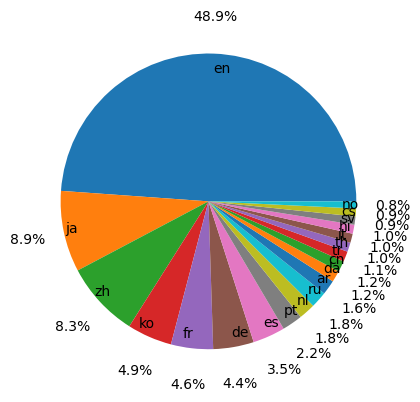

In [188]:
# Filtrar as contagens de linguagem maiores que 1000
filtered_language_count = language_count[language_count > 1000]

# Plotar o gráfico de pizza para as contagens filtradas
plt.pie(filtered_language_count, labels=filtered_language_count.index,autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.9)
plt.show()


In [182]:
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,first_air_date,last_air_date,in_production,original_name,popularity,type,status,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time,vote_average_category
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,2011-04-17,2019-05-19,False,Game of Thrones,1083.917,Scripted,Ended,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0,Muito Bom
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,2017-05-02,2021-12-03,False,La Casa de Papel,96.354,Scripted,Ended,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70,Muito Bom
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,2016-07-15,2022-07-01,True,Stranger Things,185.711,Scripted,Returning Series,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0,Muito Bom
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,2010-10-31,2022-11-20,False,The Walking Dead,489.746,Scripted,Ended,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42,Muito Bom
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,2016-01-25,2021-09-10,False,Lucifer,416.668,Scripted,Ended,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45,Muito Bom
